In [1]:
import numpy as np
import os
import csv
import runtests
import makegraphs
import makegraphs_new
import pandas
from matplotlib import pyplot as plt
import pickle

In [2]:
# plt.rcParams["figure.figsize"] = (15,8)

In [3]:
results_dict_10_31 = pickle.load (open( "10-31-tests-results-dict.p", "rb"))
str(results_dict_10_31)[:100]

"{'onedisk_128k': {'zfs': {'read': {'1': {'1': {'64m': array([[1.50100000e+00, 2.01309429e+03],\n     "

In [4]:
plt.close()
figs, _, _, write_results_dict = makegraphs_new.gen_plots("config.csv", 0, stop=0, save=False, gen_plt=False, test_dir="tests-10-31",start=0, rw_choose=['write'])

In [5]:
figs_all, write_avgs, write_mats = makegraphs_new.gen_plots_from_dict(write_results_dict, "config.csv", 0, stop=0, save=False, gen_plt=False, test_dir="tests", start=10, rw_choose=['write']) 

In [6]:
makegraphs_new.print_info_arr(write_avgs)

------------------
onedisk 128k | zfs write
NJ:1 | IOD:1 | BS:64m: 144.5997154880702
NJ:4 | IOD:1 | BS:64m: 149.65989566813556
NJ:8 | IOD:1 | BS:64m: 155.46144029896553
------------------
onedisk 128k | lustre write
NJ:1 | IOD:1 | BS:64m: 135.8108341513793
NJ:4 | IOD:1 | BS:64m: 175.11429489894743
NJ:8 | IOD:1 | BS:64m: 164.47610002508478
------------------
z2 one 8 1m | zfs write
NJ:1 | IOD:1 | BS:64m: 899.713509342143
NJ:1 | IOD:2 | BS:64m: 901.3431899085715
NJ:4 | IOD:1 | BS:64m: 813.6275124056141
NJ:4 | IOD:2 | BS:64m: 783.2435905960714
NJ:8 | IOD:1 | BS:64m: 791.3155407114288
NJ:8 | IOD:2 | BS:64m: 838.6537597100001
------------------
z2 one 8 1m | lustre write
NJ:1 | IOD:1 | BS:64m: 498.9747509732143
NJ:1 | IOD:2 | BS:64m: 499.01184449071434
NJ:4 | IOD:1 | BS:64m: 554.4621904466667
NJ:4 | IOD:2 | BS:64m: 532.875067960345
NJ:8 | IOD:1 | BS:64m: 526.5820512482759
NJ:8 | IOD:2 | BS:64m: 529.501070523226
------------------
z2 two 8 1m | zfs write
NJ:1 | IOD:1 | BS:64m: 1798.627907101

In [7]:
list(write_mats.keys())

['onedisk_128k',
 'z2_one_8_1m',
 'z2_two_8_1m',
 'z2_three_8_1m',
 'z3_one_15_1m',
 'z3_two_15_1m',
 'twodisk_1m',
 'fourdisk_1m',
 'eightdisk_1m',
 'sixteendisk_1m',
 'onedisk_1m']

In [8]:
# def comp_test_mat(test_mats, testname, stat):
#     stat_dict = {'nj':0, 'io':1, 'bs':2}
#     axis = stat_dict[stat]
#     entry = test_mats[testname]
#     # these are out statlists
#     mat = entry[0]
#     # numjobs = entry[1]
#     # iodepths = entry[2]
#     # blocksizes = entry[3]
#     avgs = np.mean(mat, axis=axis)
#     print (avgs.shape)
#     stds = np.std(mat, axis=axis)

#     info_arr = []
#     # I know this is disgusting but its just so I can iterate through 2 lists of my choosing by excluding one of (nj, io, bs)
#     stat_dict.pop(stat)
#     info_arr.append("Computing over " + stat)
#     stat_keys = list(stat_dict.keys())
#     stat_index1 = stat_dict[stat_keys[0]] + 1
#     stat_index2 = stat_dict[stat_keys[1]] + 1
#     for i, x in enumerate(entry[stat_index1]):
#         for j, y in enumerate(entry[stat_index2]):
#             avg = str(avgs[i,j])
#             std = str(stds[i,j])
#             info_arr.append ("%s:%s | %s:%s"%(stat_keys[0],x,stat_keys[1],y) + ": " + "avg: %s | std:%s"%(avg, std))
#     return info_arr


In [9]:
# nj, io, bs
testname = 'z2_one_8_1m'
mat = write_mats[testname][0]
ios = write_mats[testname][2]
# print(mat.shape)
# print (mat)
io_avgs = np.mean(mat, axis=1)
io_std = np.std(mat, axis=1)
# print (io_avgs.shape)
# print (io_avgs)
# print (io_std)
info_arr = makegraphs_new.comp_test_mat(write_mats, testname, 'io')
for line in info_arr:
    print (line)

(3, 1)
Computing over io
nj:1 | bs:64m: avg: 499.03822354060617 | std:0.6673099569696603
nj:4 | bs:64m: avg: 545.8671230737204 | std:6.467008172249906
nj:8 | bs:64m: avg: 510.799343233791 | std:18.796286522679708


In [10]:
# onedisk_zfs_write = results_dict_10_31['onedisk_128k']['zfs']['write']
# np.mean(onedisk_zfs_write['1']['1']['64m'],axis=0).shape

In [11]:
figs, _, _, read_results_dict = makegraphs_new.gen_plots("config.csv", 0, stop=0, save=False, gen_plt=False, test_dir="tests-10-31",start=0, rw_choose=['read'])

In [12]:
figs_all, read_avgs = makegraphs_new.gen_plots_from_dict(read_results_dict, "config.csv", 0, stop=0, save=False, gen_plt=True, test_dir="tests", start=10, rw_choose=['read'], avg_io=False) 

TypeError: gen_plots_from_dict() got an unexpected keyword argument 'avg_io'

In [ ]:
makegraphs_new.print_info_arr(read_avgs)

------------------
onedisk 128k | zfs write
NJ:1 | IOD:1 | BS:64m: 144.5997154880702
NJ:4 | IOD:1 | BS:64m: 149.65989566813556
NJ:8 | IOD:1 | BS:64m: 155.46144029896553
------------------
onedisk 128k | lustre write
NJ:1 | IOD:1 | BS:64m: 135.8108341513793
NJ:4 | IOD:1 | BS:64m: 175.11429489894743
NJ:8 | IOD:1 | BS:64m: 164.47610002508478
------------------
z2 one 8 1m | zfs write
NJ:1 | IOD:1 | BS:64m: 899.713509342143
NJ:1 | IOD:2 | BS:64m: 901.3431899085715
NJ:4 | IOD:1 | BS:64m: 813.6275124056141
NJ:4 | IOD:2 | BS:64m: 783.2435905960714
NJ:8 | IOD:1 | BS:64m: 791.3155407114288
NJ:8 | IOD:2 | BS:64m: 838.6537597100001
------------------
z2 one 8 1m | lustre write
NJ:1 | IOD:1 | BS:64m: 498.9747509732143
NJ:1 | IOD:2 | BS:64m: 499.01184449071434
NJ:4 | IOD:1 | BS:64m: 554.4621904466667
NJ:4 | IOD:2 | BS:64m: 532.875067960345
NJ:8 | IOD:1 | BS:64m: 526.5820512482759
NJ:8 | IOD:2 | BS:64m: 529.501070523226
------------------
z2 two 8 1m | zfs write
NJ:1 | IOD:1 | BS:64m: 1798.627907101

In [ ]:
# pickle.dump (results_dict, open( "10-31-tests-results-dict.p", "wb"))

In [ ]:
results_dict_10_31['onedisk_128k']['zfs']['write']['1']['1']

{'64m': array([[1.50100000e+00, 1.55764672e+03],
        [2.25200000e+00, 1.46406829e+03],
        [3.00300000e+00, 1.55764672e+03],
        [3.75400000e+00, 1.55764672e+03],
        [4.50500000e+00, 1.64927373e+03],
        [5.25600000e+00, 7.33009849e+02],
        [6.00700000e+00, 3.66504925e+02],
        [6.75800000e+00, 2.74878956e+02],
        [7.50900000e+00, 1.83251938e+02],
        [8.25900000e+00, 1.83251938e+02],
        [9.01000000e+00, 3.66504925e+02],
        [9.76100000e+00, 4.57520620e+02],
        [1.05120000e+01, 2.74878956e+02],
        [1.12630000e+01, 2.74511953e+02],
        [1.20140000e+01, 2.74878956e+02],
        [1.27650000e+01, 1.83251938e+02],
        [1.35160000e+01, 1.83251938e+02],
        [1.42670000e+01, 1.83251938e+02],
        [1.50180000e+01, 1.83007619e+02],
        [1.57690000e+01, 1.83251938e+02],
        [1.65200000e+01, 1.83007619e+02],
        [1.72710000e+01, 1.83251938e+02],
        [1.80220000e+01, 1.83007619e+02],
        [1.87730000e+01, 1.

c:\Users\kevishi\OneDrive - KLA Corporation\Documents\PFS\mytestcode\makegraphs_new.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


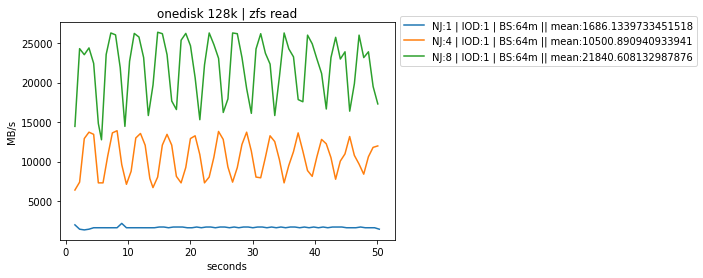

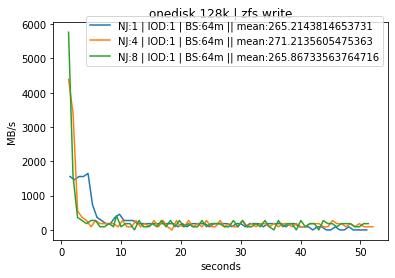

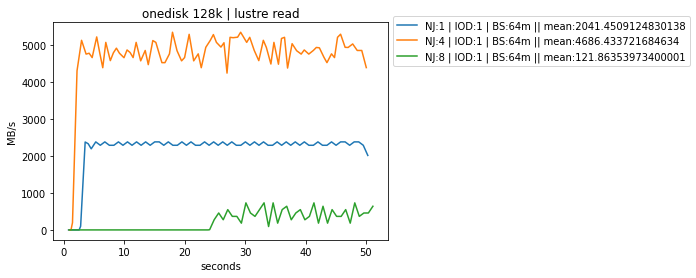

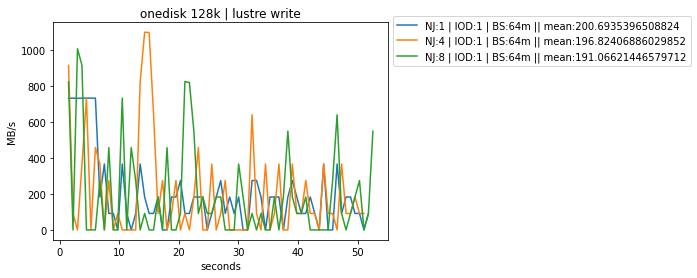

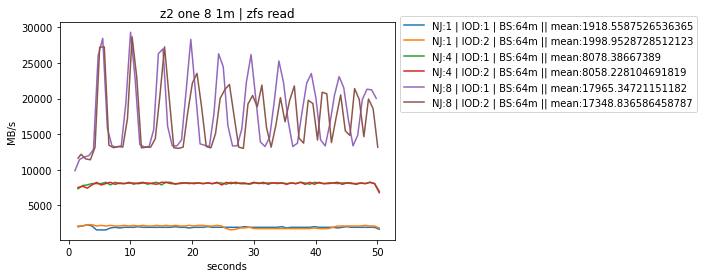

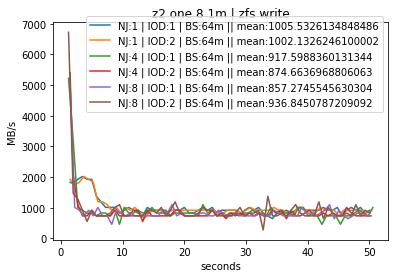

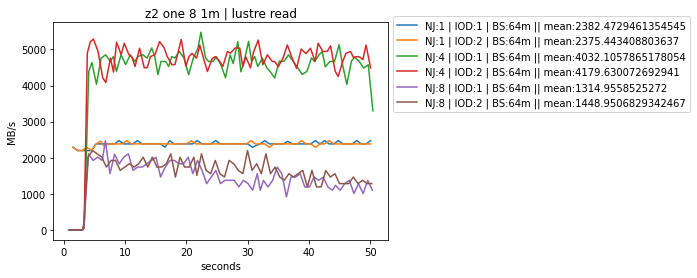

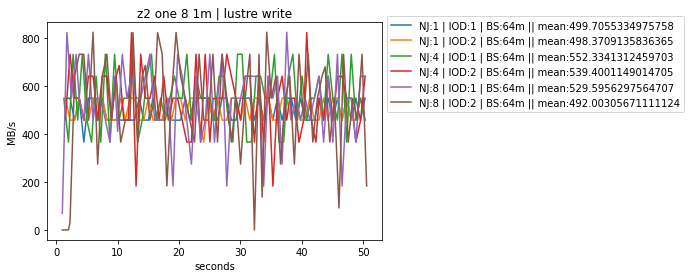

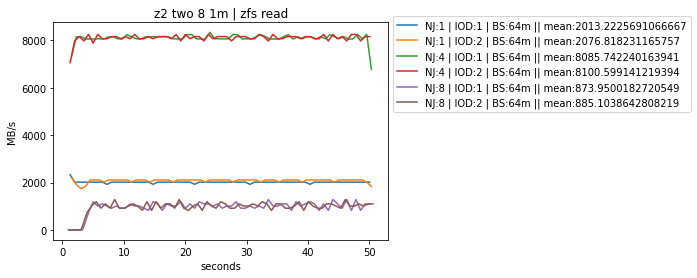

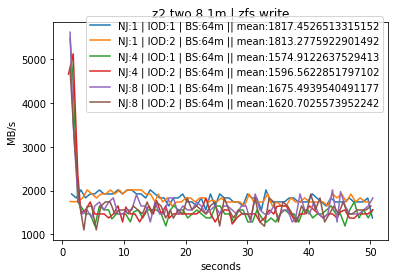

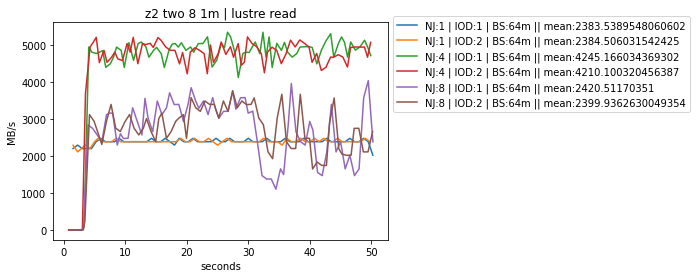

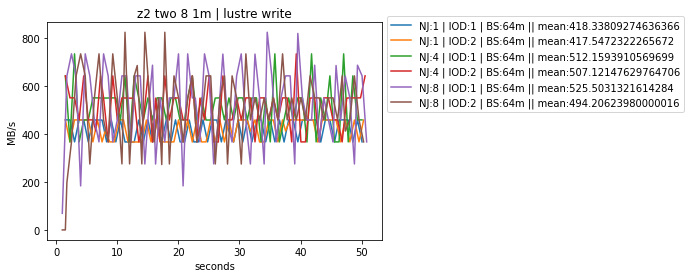

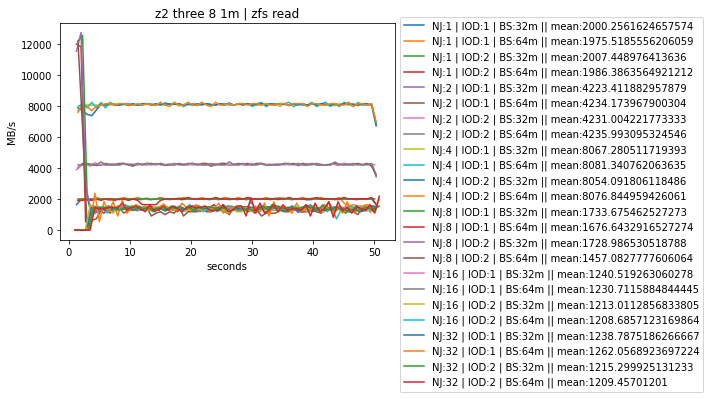

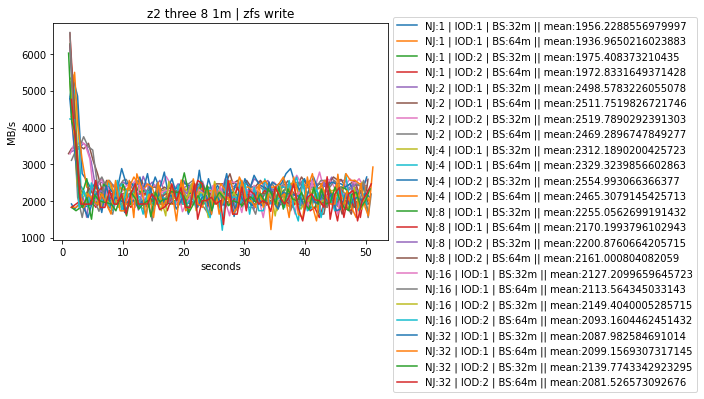

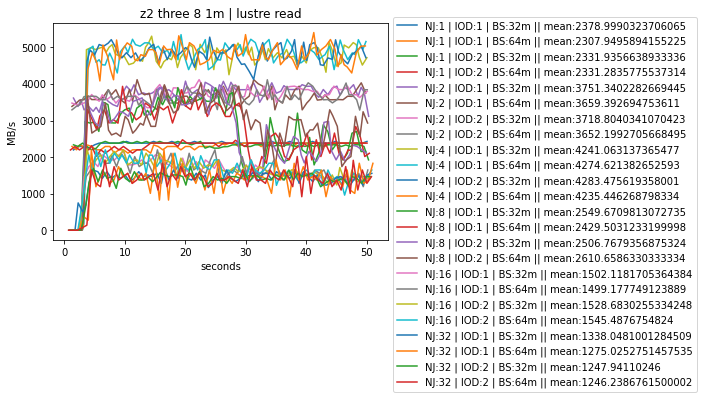

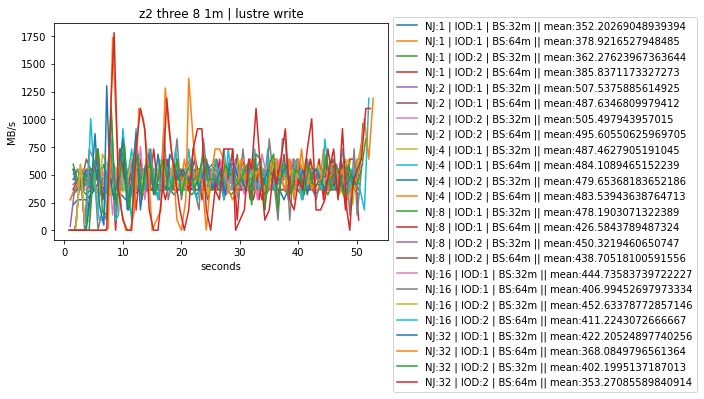

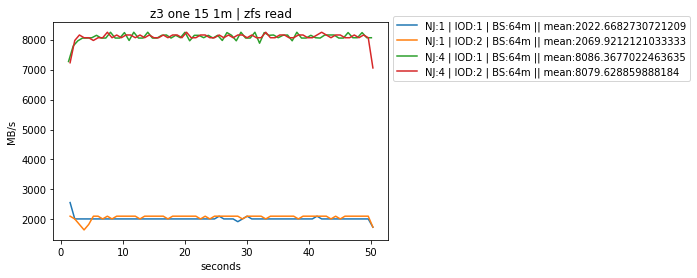

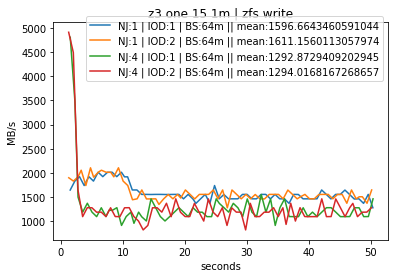

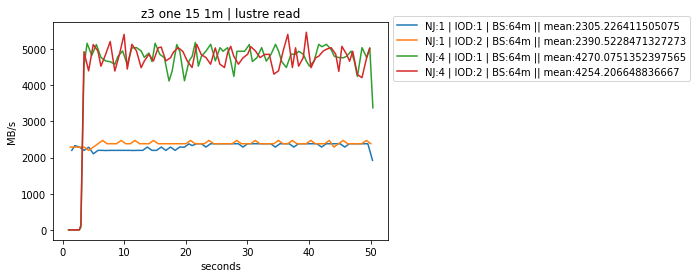

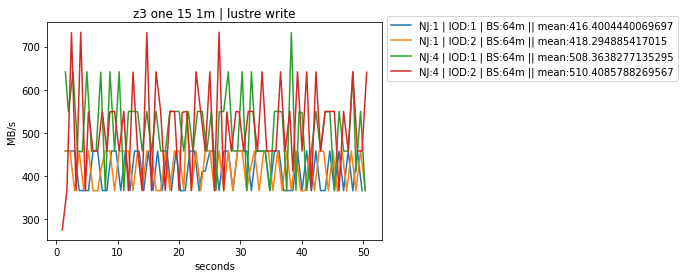

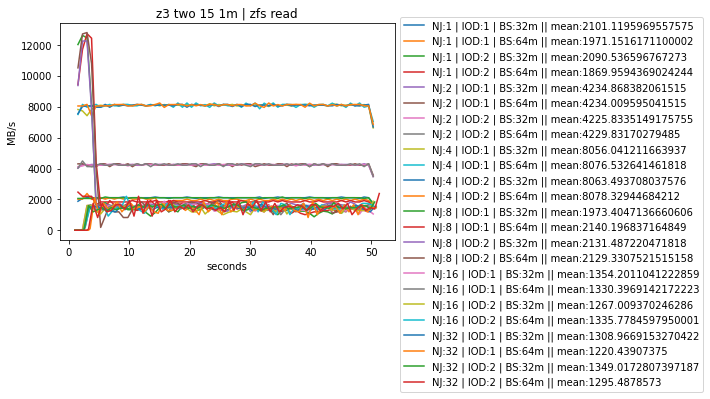

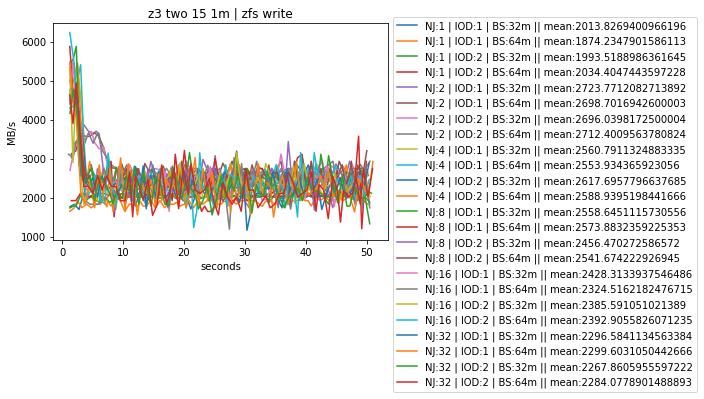

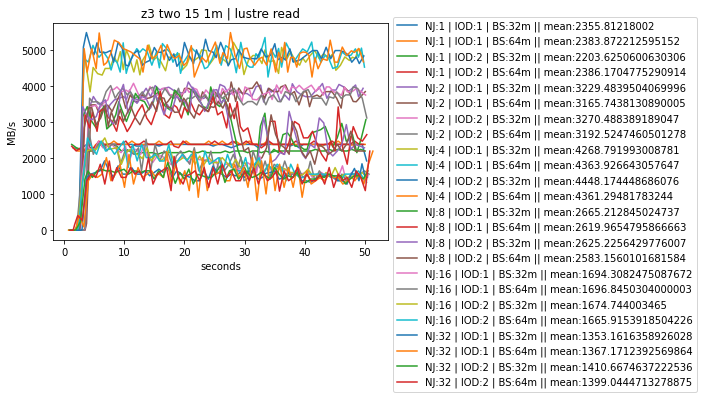

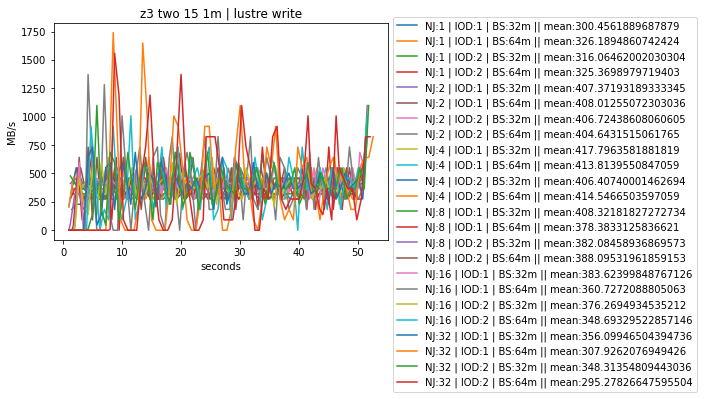

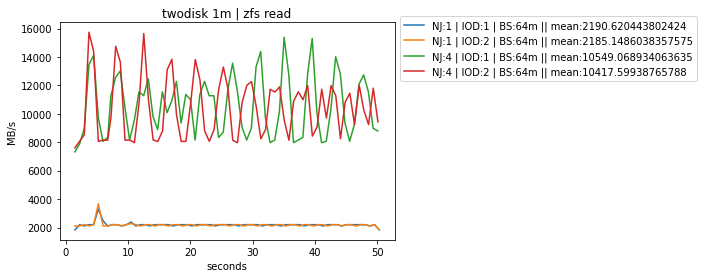

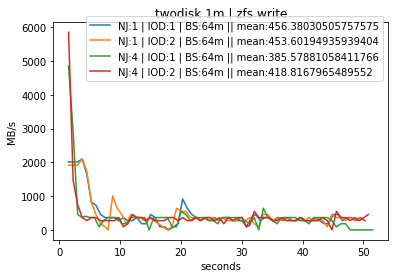

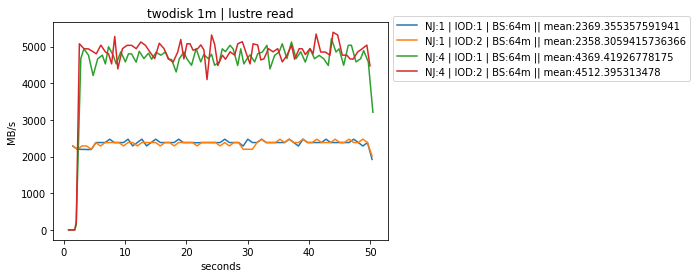

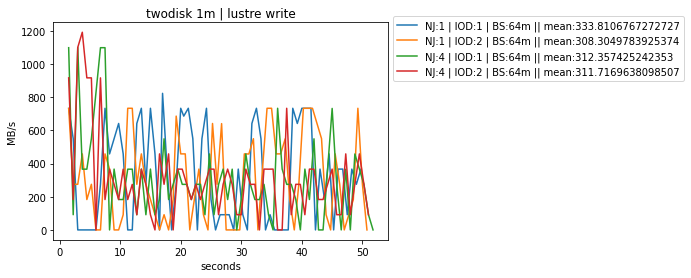

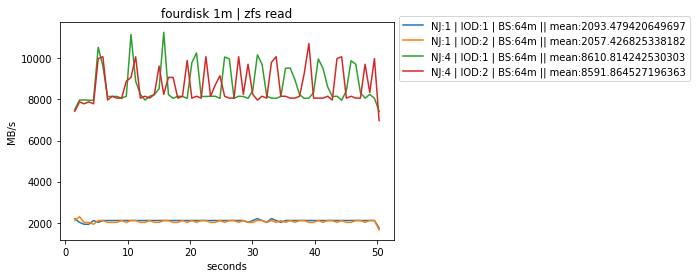

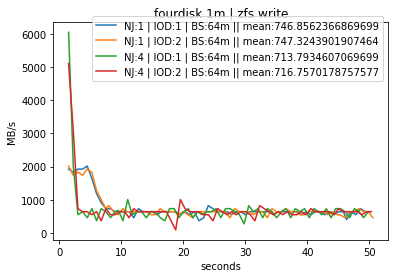

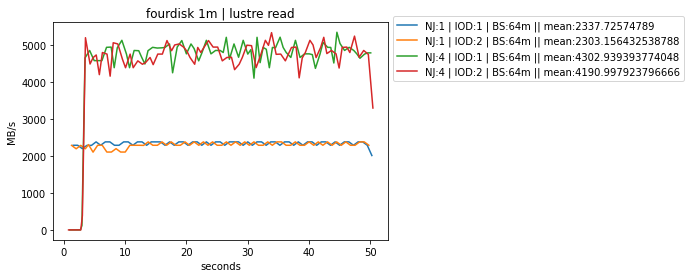

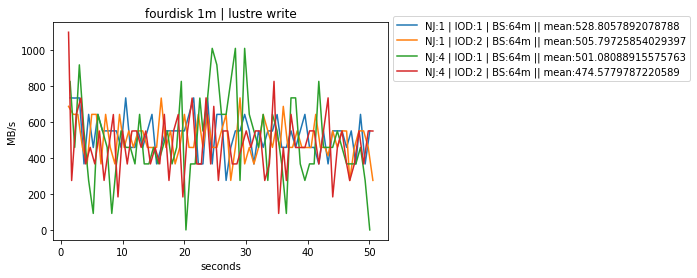

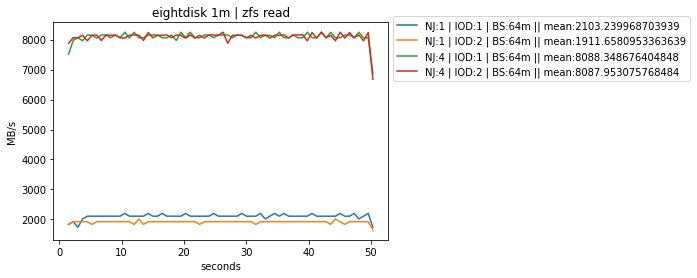

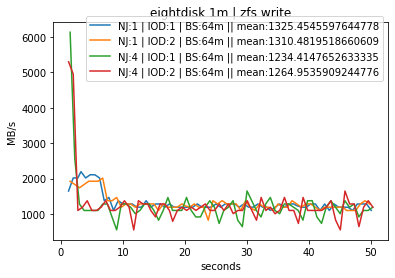

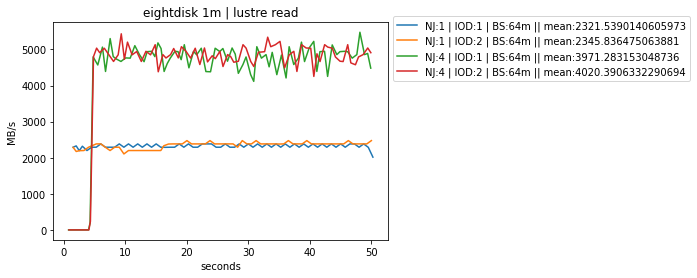

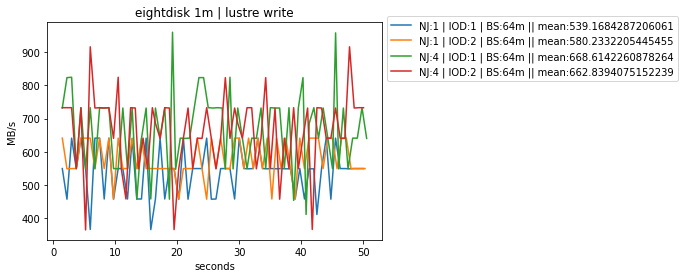

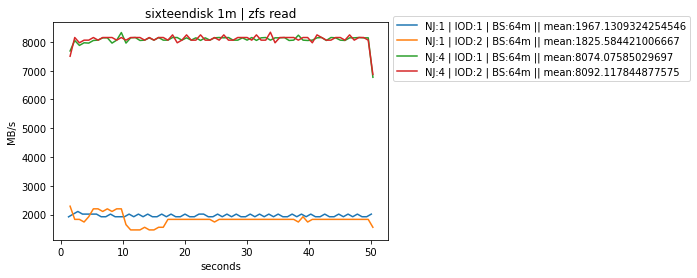

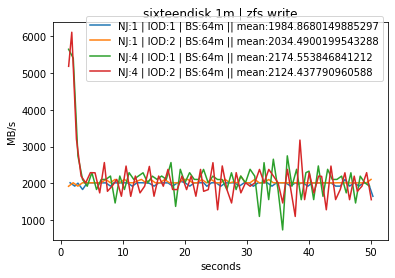

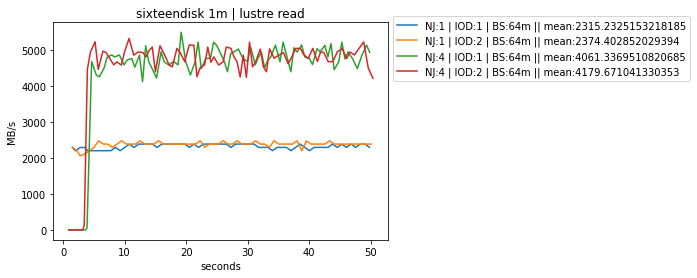

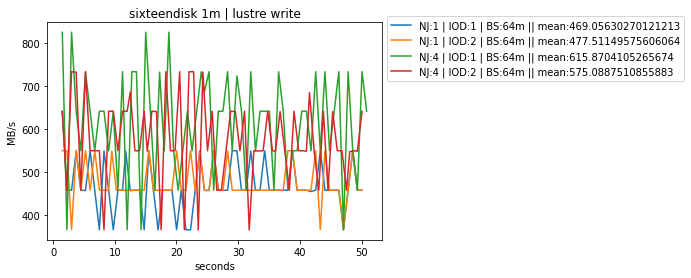

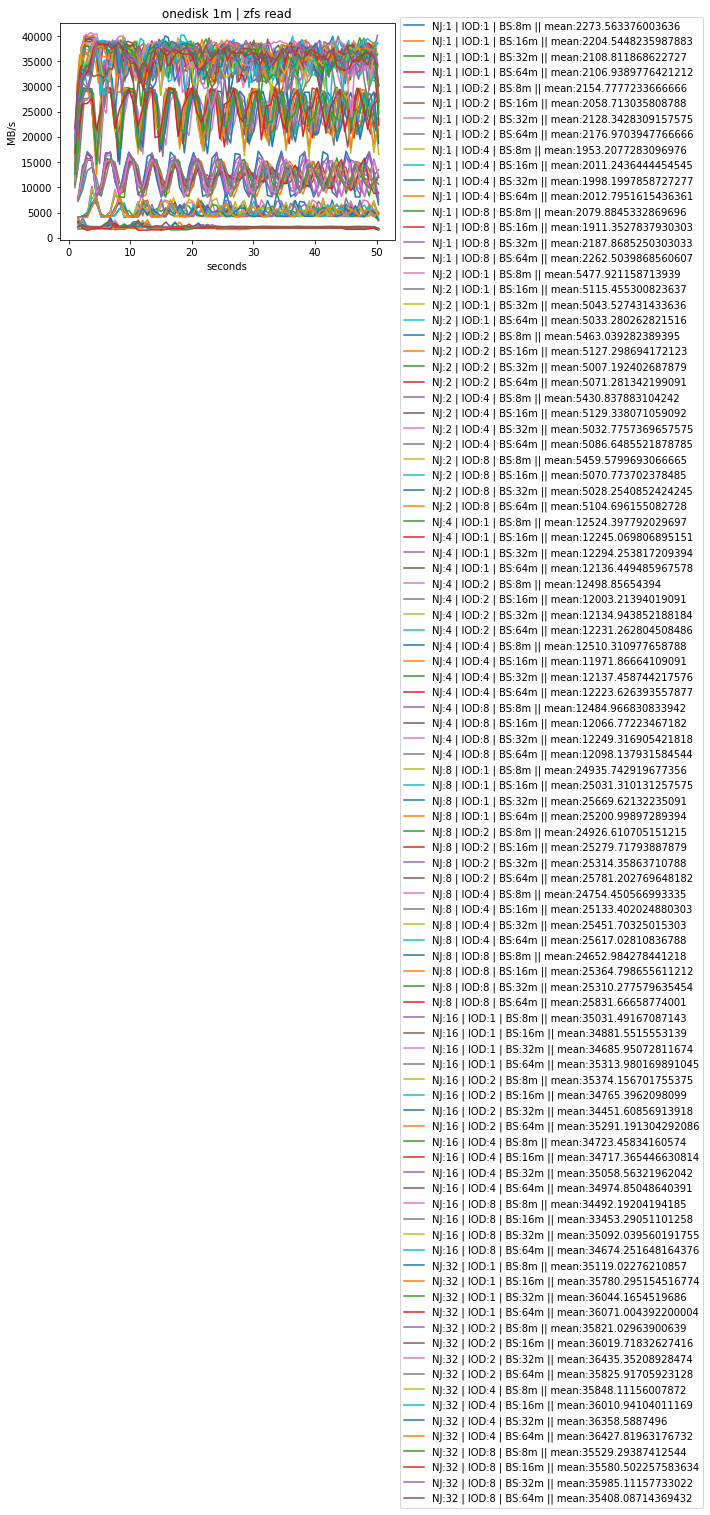

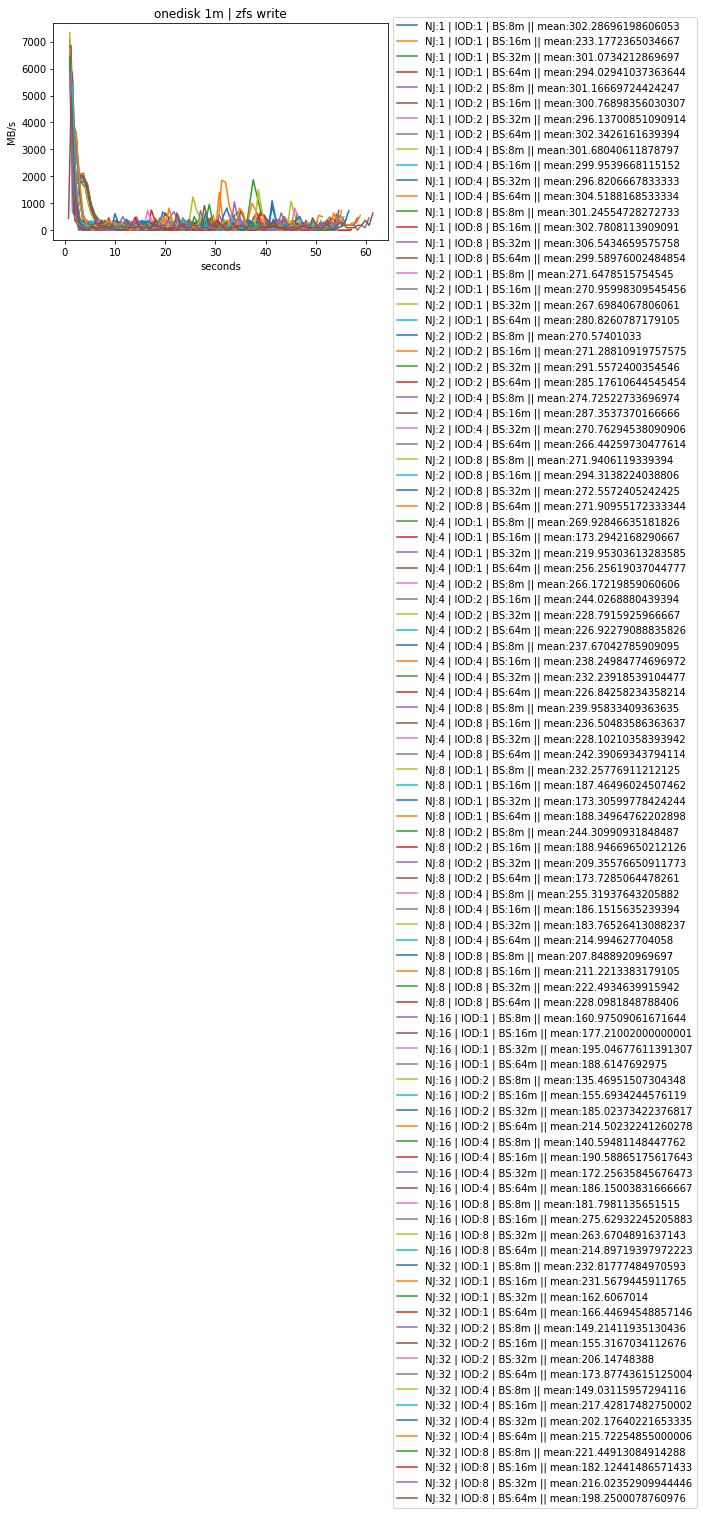

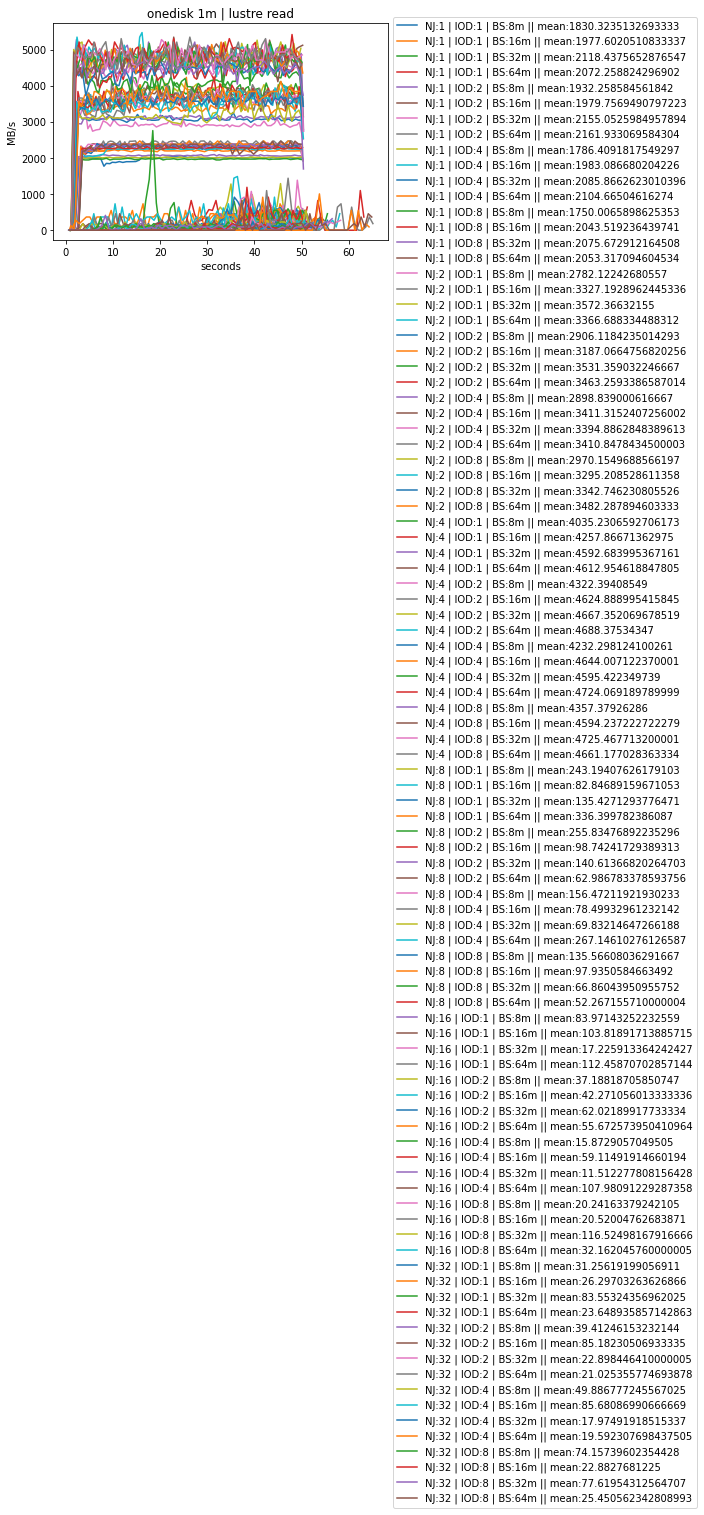

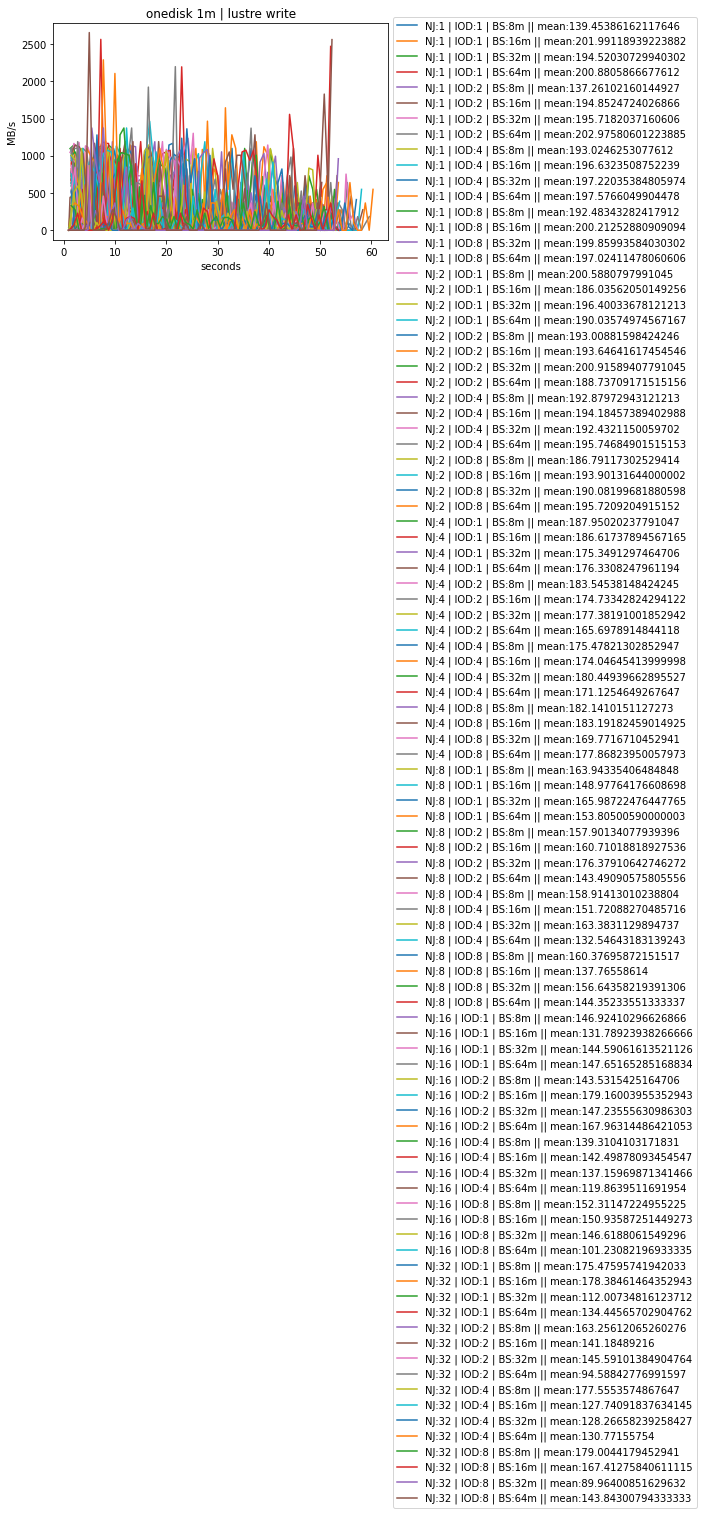

In [ ]:
figs_all, avgs = makegraphs_new.gen_plots_from_dict(results_dict_10_31, "config.csv", 0, stop=0, save=False, gen_plt=True, test_dir="tests", start=0, rw_choose=None, fs_choose=None, avg_io=False,graph_save_dir_prefix="")